Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



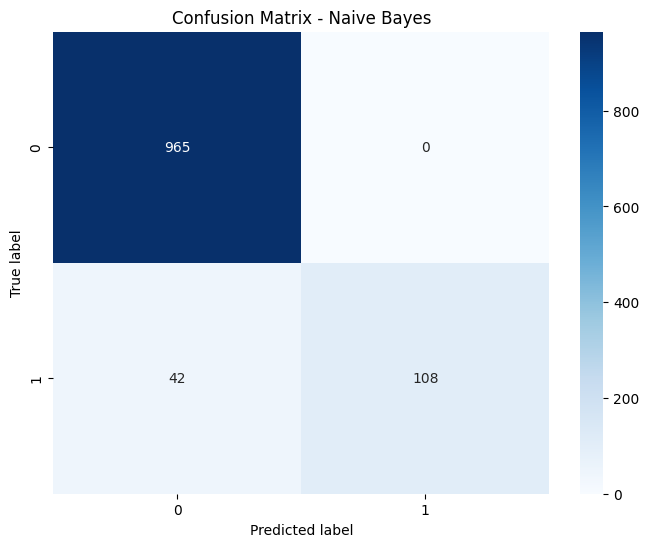


Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



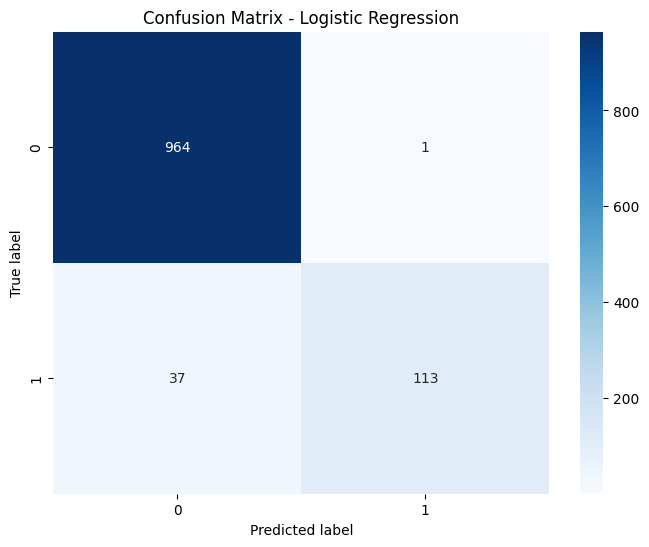

Enter a sentencesupp bro?

Classification result for the new message: Ham


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and preprocess the data
def load_data(file_path):
    # Try loading with 'latin-1' encoding and infer column names
    df = pd.read_csv(file_path, encoding='latin-1')
    # Print the detected column names to verify
    print(df.columns)
    # Rename the columns to 'label' and 'message' if needed
    df = df[['v1', 'v2']] # Assuming the first two columns are label and message
    df.columns = ['label', 'message']
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})
    return df


# Step 2: Split the data into training and testing sets
def split_data(df):
    X = df['message']
    y = df['label']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature extraction using TF-IDF
def extract_features(X_train, X_test):
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf, vectorizer

# Step 4: Train and evaluate classifiers
def train_and_evaluate(X_train, X_test, y_train, y_test):
    classifiers = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(random_state=42)
    }

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        print(f"\n{name} Classifier:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

# Main execution
if __name__ == "__main__":
    # Load data
    df = load_data('/content/spam.csv')

    # Split data
    X_train, X_test, y_train, y_test = split_data(df)

    # Extract features
    X_train_tfidf, X_test_tfidf, vectorizer = extract_features(X_train, X_test)

    # Train and evaluate classifiers
    train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test)

    # Function to classify new messages
    def classify_message(message, classifier, vectorizer):
        message_tfidf = vectorizer.transform([message])
        prediction = classifier.predict(message_tfidf)
        return "Spam" if prediction[0] == 1 else "Ham"

    # Example usage
    nb_classifier = MultinomialNB().fit(X_train_tfidf, y_train)
    new_message = input("Enter a sentence")
    result = classify_message(new_message, nb_classifier, vectorizer)
    print(f"\nClassification result for the new message: {result}")